<a href="https://colab.research.google.com/github/jackson119/new_0.50/blob/main/Mnist_new_0.50(0.50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import keras
import timeit
import datetime

In [5]:
print(tf.__version__)

2.4.1


## **import required library**

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
np.random.seed(10)

### Preproccessing data

In [7]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')


In [9]:
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [10]:
y_TrainOneHot=utils.to_categorical(y_Train)
y_TestOneHot=utils.to_categorical(y_Test)

In [11]:
##from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

### construct model

In [13]:
model=Sequential()

In [14]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(128,activation='relu'))

In [21]:
model.add(Dropout(0.50))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = timeit.default_timer()
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.20,epochs=10,batch_size=300,verbose=2)
end_time = timeit.default_timer()
end_time_conversion=datetime.timedelta(seconds=end_time-start_time)
converted_time = str(end_time_conversion)
print("time needed to complete the process", converted_time)

Epoch 1/10
160/160 - 32s - loss: 0.4692 - accuracy: 0.8542 - val_loss: 0.1007 - val_accuracy: 0.9703
Epoch 2/10
160/160 - 1s - loss: 0.1338 - accuracy: 0.9602 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 3/10
160/160 - 1s - loss: 0.0969 - accuracy: 0.9705 - val_loss: 0.0504 - val_accuracy: 0.9852
Epoch 4/10
160/160 - 1s - loss: 0.0784 - accuracy: 0.9767 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 5/10
160/160 - 1s - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 6/10
160/160 - 1s - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0351 - val_accuracy: 0.9896
Epoch 7/10
160/160 - 1s - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0338 - val_accuracy: 0.9908
Epoch 8/10
160/160 - 1s - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0299 - val_accuracy: 0.9908
Epoch 9/10
160/160 - 1s - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0304 - val_accuracy: 0.9912
Epoch 10/10
160/160 - 1s - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0308 - val_accuracy: 0.991

In [25]:
from matplotlib import pyplot as plt

In [26]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])   ### the training model will be stored into dictionary that why we can rethreived it like this.
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('Train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

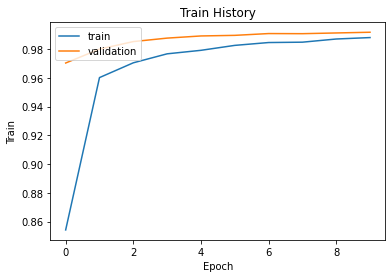

In [27]:
show_train_history(train_history,'accuracy','val_accuracy')

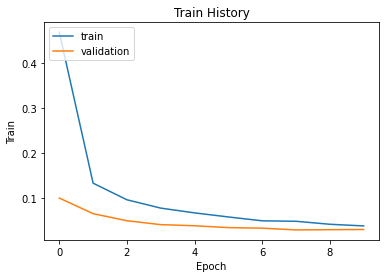

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores=model.evaluate(x_Test4D_normalize,y_TestOneHot) ### evaluate only used for testing images and labels
print()
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0213 - accuracy: 0.9922

Test loss: 0.021341077983379364 / Test accuracy: 0.9922000169754028


In [30]:
prediction=model.predict_classes(x_Test4D_normalize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25          ### set the number to 25 if exceed it will set to 25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)  ## increase by 1 everytime
    ax.imshow(images[idx],cmap='binary') #### plot the graph
    title='label='+str(labels[idx])      ####  set the title

    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([]) ### wont show the scale for x axis and y axis

    idx+=1
plt.show()

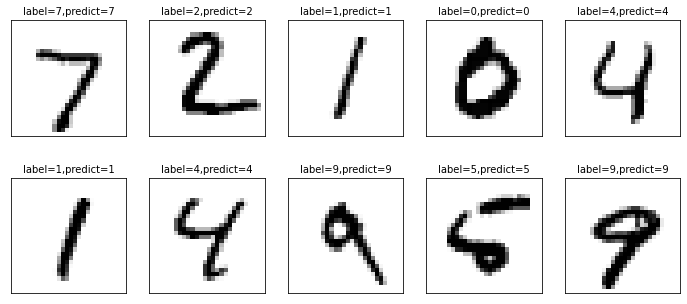

In [32]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [33]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1129,3,1,0,0,0,1,1,0
2,2,0,1029,0,0,0,0,1,0,0
3,0,0,2,1003,0,1,0,1,3,0
4,0,0,1,0,980,0,0,0,0,1
5,2,0,0,5,0,882,2,0,0,1
6,3,2,0,0,2,1,947,0,3,0
7,0,2,5,0,0,0,0,1018,1,2
8,2,0,2,1,0,0,0,1,966,2
